In [1]:
# Imports de avisos
import sys
import warnings
import matplotlib.cbook
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

# Imports para manipulacao de dados
import pandas as pd
import numpy as np

# Import para visualizacao dos dados
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix
import itertools

# Imports de bibliotecas para treinamento de redes neurais convolucionais
import tensorflow as tf
#from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [2]:
# Carregando o dataset com imagens do MNIST direto do pacote do Tensorflow
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

# Colocando os dados na mesma escala [0, 1]
X_train = X_train.astype("float32") / 255
X_test  = X_test.astype("float32") / 255

# Realizando o redimensionamento para (28, 28, 1)
X_train = np.expand_dims(X_train, -1)
X_test  = np.expand_dims(X_test, -1)

print("X_train shape:", X_train.shape)
print(X_train.shape[0], " exemplos para treinamento")
print(X_test.shape[0], " exemplos para teste")

# Convertendo o target para uma matriz de classes (0 a 9)
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test  = to_categorical(y_test, num_classes)

X_train shape: (60000, 28, 28, 1)
60000  exemplos para treinamento
10000  exemplos para teste


In [3]:
#Criação e Validação dos Modelos de Machine Learning
#Convolutional Neural Network

# Parametros do modelo
input_shape = (28, 28, 1)
batch_size  = 128
epochs      = 15

# Definicao da estrutura do modelo
model_cnn = Sequential()
model_cnn.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model_cnn.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model_cnn.add(MaxPool2D(pool_size=(2,2)))
model_cnn.add(Dropout(0.25))

model_cnn.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model_cnn.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model_cnn.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model_cnn.add(Dropout(0.25))

model_cnn.add(Flatten())
model_cnn.add(Dense(256, activation = "relu"))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(10, activation = "softmax"))

# Instanciando a funcao de perda e a metrica de desempenho
model_cnn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Exibindo o resumo
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0

In [4]:
# Realizando o treinamento do modelo CNN
model_cnn.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)



Epoch 1/15
422/422 [==============================] - 90s 214ms/step - loss: 0.2991 - accuracy: 0.9036 - val_loss: 0.0518 - val_accuracy: 0.9850
Epoch 2/15
422/422 [==============================] - 90s 214ms/step - loss: 0.0991 - accuracy: 0.9702 - val_loss: 0.0445 - val_accuracy: 0.9885
Epoch 3/15
422/422 [==============================] - 99s 235ms/step - loss: 0.0754 - accuracy: 0.9780 - val_loss: 0.0398 - val_accuracy: 0.9885
Epoch 4/15
422/422 [==============================] - 99s 234ms/step - loss: 0.0641 - accuracy: 0.9809 - val_loss: 0.0334 - val_accuracy: 0.9907
Epoch 5/15
422/422 [==============================] - 95s 225ms/step - loss: 0.0558 - accuracy: 0.9831 - val_loss: 0.0316 - val_accuracy: 0.9915
Epoch 6/15
422/422 [==============================] - 97s 229ms/step - loss: 0.0477 - accuracy: 0.9853 - val_loss: 0.0311 - val_accuracy: 0.9930
Epoch 7/15
422/422 [==============================] - 99s 234ms/step - loss: 0.0458 - accuracy: 0.9856 - val_loss: 0.0286 - val_ac

In [5]:
# Avaliando o desempenho do modelo CNN com dados de teste
score = model_cnn.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.0176748838275671
Test accuracy: 0.9940000176429749


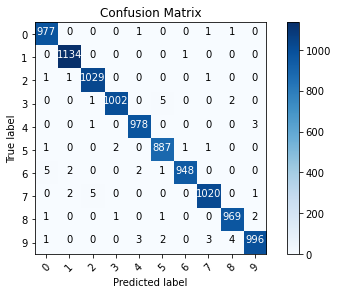

In [6]:
# Plot da Confusion Matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Realiza as previsoes com o dataset de teste
y_pred = model_cnn.predict(X_test)

# Converte as previsoes em vetores one hot
y_pred_classes = np.argmax(y_pred, axis = 1) 

# Converte as observacoes em vetores one hot
y_true = np.argmax(y_test, axis = 1) 

# Executa a matriz de confusao
confusion_mtx = confusion_matrix(y_true, y_pred_classes) 

# Exibindo a matriz de confusao
plot_confusion_matrix(confusion_mtx, classes = range(10))

In [7]:
# Configurando a reducao automatica da taxa de aprendizado
learning_rate_reduction = ReduceLROnPlateau(monitor  = 'val_acc', 
                                            patience = 3, 
                                            verbose  = 1, 
                                            factor   = 0.5, 
                                            min_lr   = 0.00001)


In [8]:
# Gerando novos dados com a técnica 'data augmentation'
datagen = ImageDataGenerator(featurewise_center            = False,
                             samplewise_center             = False,
                             featurewise_std_normalization = False,
                             samplewise_std_normalization  = False,
                             zca_whitening                 = False,
                             rotation_range                = 10,
                             zoom_range                    = 0.1,
                             width_shift_range             = 0.1,
                             height_shift_range            = 0.1,
                             horizontal_flip               = False,
                             vertical_flip                 = False)

datagen.fit(X_train)

In [9]:
epochs = 30
#prx vez usar gpu

# Treinamento do modelo otimizado
history = model_cnn.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
                                  epochs = epochs, 
                                  validation_data = (X_test, y_test),
                                  verbose = 2, 
                                  steps_per_epoch = X_train.shape[0],
                                  callbacks=[learning_rate_reduction])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30


KeyboardInterrupt: 